In [22]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

realizamos la peticion a la web

In [23]:
result= requests.get("https://www.meteored.mx/clima_Puebla-America+Norte-Mexico-Puebla--1-21044.html")

Obtenemos estatusCode y html en un string

In [24]:
statusCode=result.status_code

In [25]:
statusCode

200

pasamos el contenido html a un objeto BeautifulSoup

In [26]:
html=BeautifulSoup(result.text, "html.parser")

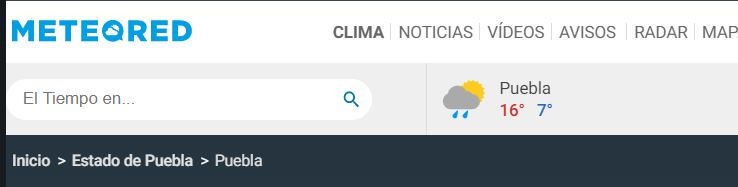

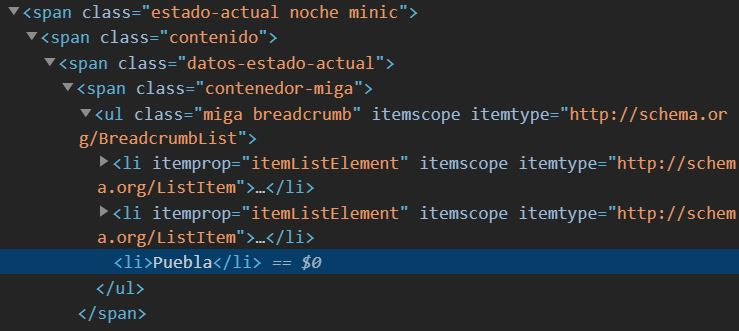

In [27]:
#extraemos lugar
entradas=html.find_all('span',{'class': 'contenedor-miga'})
lugar=entradas[len(entradas)-1].getText()
lugar=lugar.split(" ")
lugar=lugar[len(lugar)-1]
    
#guardasmos lugar y fecha y hora
datos = [lugar,time.strftime("%H:%M:%S"),time.strftime("%d/%m/%y")]

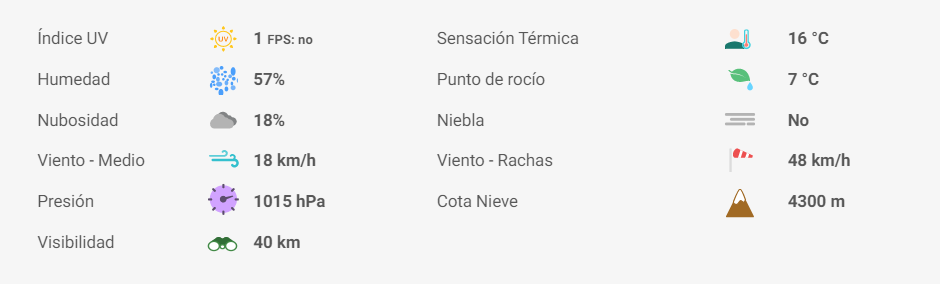

sacamos la primera columna de los datos

In [28]:
entradas=html.find_all('td',{'class': 'first-column'})

In [29]:
en=entradas[0].find_all('dd', {'class': 'ddD2'})
aux=0
for aux2 in  en:
    datos.append(aux2.getText())
    


In [30]:
datos

['Puebla',
 '18:05:34',
 '11/01/21',
 '1 FPS: no',
 '63%',
 '43%',
 '15 km/h',
 '1018 hPa',
 '14 km']

procedemos a sacar la segunda columna de los datos

In [31]:
entradas=html.find_all('td',{'class': 'second-column'})
en=entradas[0].find_all('dd', {'class': 'ddD2'})
aux=0
for aux2 in  en:
    datos.append(aux2.getText())
    
datos

['Puebla',
 '18:05:34',
 '11/01/21',
 '1 FPS: no',
 '63%',
 '43%',
 '15 km/h',
 '1018 hPa',
 '14 km',
 '14 °C',
 '7 °C',
 'No',
 '40 km/h',
 '4100 m']

Procedemos a sacar la direccion del viento que esta en otro apartado

In [32]:
viento=html.find_all('span',{'class': 'datos-viento'})
viento=viento[0].find_all('strong')
viento[0].getText()

'Sur'

limpieza de datos

In [33]:
fin=[datos[0]]
fin.append(datos[1])
fin.append(datos[2])
#separamos primera linea
aux= datos[3].split(" FPS: ")
fin.append(aux[0])
#primer indice
if (aux[1] == 'no'):
        fin.append("0")
else:
    fin.append(aux[1])
#eliminamos ultimo caracter
fin.append(datos[4][0:len(datos[4])-1])
fin.append(datos[5][0:len(datos[5])-1])

#separamos por espacio y guardamos primer token
fin.append((datos[6].split(" "))[0])
fin.append((datos[7].split(" "))[0])
fin.append((datos[8].split(" "))[0])
fin.append((datos[9].split(" "))[0])
fin.append((datos[10].split(" "))[0])

#identificamos si es numero o 'no'
if (datos[11] == 'No'):
        fin.append("0")
else:
    fin.append(datos[11])

#separamos por espacio
fin.append((datos[12].split(" "))[0])
fin.append((datos[13].split(" "))[0])
fin

['Puebla',
 '18:05:34',
 '11/01/21',
 '1',
 '0',
 '63',
 '43',
 '15',
 '1018',
 '14',
 '14',
 '7',
 '0',
 '40',
 '4100']

guardamos en una base de datos

In [34]:
#abrimos la tabla
frame=pd.read_csv('auxx.csv')
frame

,Lugar,Hora,Fecha,Indice UV,Algo,Humedad,Nubosidad,Viento-Medio,Presion,Visibilidad,Sensacion Termica,Punto de rocio,Niebla,Viento_racha,Cota Nieve,Viento_Medio,DirViento
0,Pepito,21/03/20,21:34:45,2,0,21%,38,NaN,1015,35,25,0,0,45,4800,24,Sureste
1,Arzúa,21/04/20,19:43:04,0,0,94%,99,NaN,1017,6,9,9,0,20,2900,10,Noroeste
2,Bertamiráns,21/04/20,19:43:07,0,0,90%,69,NaN,1017,14,12,10,0,19,2800,8,Noroeste
3,Cascais,21/04/20,19:43:10,0,0,93%,61,NaN,1018,12,8,9,0,29,2800,13,Norte
4,Corrubedo,21/04/20,19:43:13,0,0,84%,63,NaN,1017,18,13,11,0,33,2700,20,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Coruña,23/04/20,11:47:34,4,6-10,79%,43,NaN,1018,30,14,11,0,24,3300,13,Noroeste
82,Ferrol,23/04/20,11:47:37,4,6-10,75%,29,NaN,1018,30,15,11,0,26,3300,11,Noroeste
83,Lira,23/04/20,11:47:39,4,6-10,75%,0%,NaN,1017,30,15,11,0,36,3300,24,Noroeste
84,Lousame,23/04/20,11:47:42,4,6-10,64%,4%,NaN,1017,30,19,12,0,23,3300,8,Oeste


In [35]:
#creamoso una table igual para despues concatenar
frame2=pd.DataFrame([fin],columns=["Lugar","Hora","Fecha","Indice UV","Algo","Humedad","Nubosidad","Viento_Medio","Presion","Visibilidad","Sensacion Termica","Punto de rocio","Niebla","Viento_racha","Cota Nieve"])

In [36]:
frame2

,Lugar,Hora,Fecha,Indice UV,Algo,Humedad,Nubosidad,Viento_Medio,Presion,Visibilidad,Sensacion Termica,Punto de rocio,Niebla,Viento_racha,Cota Nieve
0,Puebla,18:05:34,11/01/21,1,0,63,43,15,1018,14,14,7,0,40,4100


In [37]:
#concatenamos
res=frame.append(frame2,sort=False)


In [16]:
#guardamos
res.to_csv('auxx.csv', header=True, index=False)